# Uber Data Analysis
This notebook performs basic data analysis on Uber trip data stored in CSV files.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:



# Step 1: Set correct path
folder_path = r"C:\Users\harsh gangavane\OneDrive\Documents\internship_coll[1]\internship coll\uber_data"

# Step 2: Show what's inside the folder (for debugging)
try:
    all_files = os.listdir(folder_path)
    print("📂 Files and folders inside:")
    for f in all_files:
        print(" -", f)
except FileNotFoundError:
    raise FileNotFoundError("❌ Folder not found! Double-check the full path.")

# Step 3: Filter only CSV files
csv_files = [f for f in all_files if f.lower().endswith(".csv")]

if not csv_files:
    raise FileNotFoundError("❌ No CSV files found in the folder.")

print(f"✅ Found {len(csv_files)} CSV file(s):", csv_files)

# Step 4: Load one by one and combine
df_list = []
for file_name in csv_files:
    full_path = os.path.join(folder_path, file_name)
    print(f"📥 Reading: {file_name}")
    df_list.append(pd.read_csv(full_path, encoding='latin1'))

# Step 5: Concatenate all data
df = pd.concat(df_list, ignore_index=True)
print(f"✅ Final DataFrame shape: {df.shape}")
df.head()


📂 Files and folders inside:
 - other-American_B01362.csv
 - other-Carmel_B00256.csv
 - other-Dial7_B00887.csv
 - other-Diplo_B01196.csv
 - other-Federal_02216.csv
 - other-FHV-services_jan-aug-2015.csv
 - other-Firstclass_B01536.csv
 - other-Highclass_B01717.csv
 - other-Lyft_B02510.csv
 - other-Prestige_B01338.csv
 - other-Skyline_B00111.csv
 - Uber-Jan-Feb-FOIL.csv
 - uber-raw-data-apr14.csv
 - uber-raw-data-aug14.csv
 - uber-raw-data-janjune-15.csv
 - uber-raw-data-jul14.csv
 - uber-raw-data-jun14.csv
 - uber-raw-data-may14.csv
 - uber-raw-data-sep14.csv
 - uber_analysis.py
✅ Found 19 CSV file(s): ['other-American_B01362.csv', 'other-Carmel_B00256.csv', 'other-Dial7_B00887.csv', 'other-Diplo_B01196.csv', 'other-Federal_02216.csv', 'other-FHV-services_jan-aug-2015.csv', 'other-Firstclass_B01536.csv', 'other-Highclass_B01717.csv', 'other-Lyft_B02510.csv', 'other-Prestige_B01338.csv', 'other-Skyline_B00111.csv', 'Uber-Jan-Feb-FOIL.csv', 'uber-raw-data-apr14.csv', 'uber-raw-data-aug14.c

,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5,Date,Time,PU_Adress,Base_No,...,active_vehicles,trips,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20508122 entries, 0 to 20508121
Data columns (total 41 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DATE                     object 
 1   TIME                     object 
 2   PICK UP ADDRESS          object 
 3   Unnamed: 3               object 
 4   Unnamed: 4               float64
 5   Unnamed: 5               float64
 6   Date                     object 
 7   Time                     object 
 8   PU_Adress                object 
 9   Base_No                  object 
 10  State                    object 
 11  PuFrom                   object 
 12  Address                  object 
 13  Street                   object 
 14  PU_Address               object 
 15  DO_Address               object 
 16  Routing Details          object 
 17  PU_Address.1             object 
 18  Status                   object 
 19  Base Number              object 
 20  Base Name                object 
 21  Pick U

In [4]:
df.describe(include='all')

,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5,Date,Time,PU_Adress,Base_No,...,active_vehicles,trips,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
count,731047,731047,579122,1198,0.0,0.0,678033,678033,256519,256519,...,354.000000,354.000000,4534327,4.534327e+06,4.534327e+06,4534327,14270479,14270479,14108284,1.427048e+07
unique,92,1498,83145,14,NaN,NaN,267,4417,63738,7,...,NaN,NaN,260093,NaN,NaN,5,8,2744783,284,NaN
top,9/13/2014,9:00:00 AM,base 4980 Broadway NYC,b02764,NaN,NaN,9/18/2014,15:00,JFK,B00256,...,NaN,NaN,4/7/2014 20:21:00,NaN,NaN,B02617,B02764,2015-06-27 20:52:00,B02764,NaN
freq,10370,2543,3137,273,NaN,NaN,6694,8221,28179,249080,...,NaN,NaN,97,NaN,NaN,1458853,5753653,213,4352321,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1307.435028,11667.316384,NaN,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,NaN,1.520574e+02
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1162.510626,10648.284865,NaN,3.994991e-02,5.726670e-02,NaN,NaN,NaN,NaN,7.159620e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,112.000000,629.000000,NaN,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,296.750000,2408.500000,NaN,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,NaN,9.200000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1077.000000,9601.000000,NaN,4.074220e+01,-7.398340e+01,NaN,NaN,NaN,NaN,1.570000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1417.000000,13711.250000,NaN,4.076100e+01,-7.396530e+01,NaN,NaN,NaN,NaN,2.300000e+02


In [5]:
df.isnull().sum()

DATE                       19777075
TIME                       19777075
PICK UP ADDRESS            19929000
Unnamed: 3                 20506924
Unnamed: 4                 20508122
Unnamed: 5                 20508122
Date                       19830089
Time                       19830089
PU_Adress                  20251603
Base_No                    20251603
State                      20313130
PuFrom                     20350160
Address                    20313130
Street                     20313130
PU_Address                 20257378
DO_Address                 20507855
Routing Details            20507846
PU_Address.1               20507846
Status                     20507846
Base Number                20481941
Base Name                  20481941
Pick Up Date               20481941
Number of Trips            20481941
Number of Vehicles         20481941
time_of_trip               20240421
start_lat                  20240422
start_lng                  20240422
    Street_Address         2

In [6]:
# 🔍 Step 1: Show all available columns first
print("🧾 Columns in your DataFrame:")
print(df.columns.tolist())

# 🛠️ Step 2: Set the correct datetime column here (based on what you see above)
# Example: if you see 'Date/Time' or 'pickup_datetime', set that
datetime_col = 'Date/Time'  # 🔁 CHANGE THIS to match your column exactly

# ✅ Step 3: Convert to datetime
if datetime_col not in df.columns:
    raise KeyError(f"❌ Column '{datetime_col}' not found in DataFrame. Please check spelling/capitalization.")

df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')  # errors='coerce' avoids crash if format is wrong
df['date'] = df[datetime_col].dt.date
df['hour'] = df[datetime_col].dt.hour
df['day_of_week'] = df[datetime_col].dt.day_name()

# ✅ Step 4: Show updated DataFrame
print("✅ Datetime column parsed successfully!")
df[[datetime_col, 'date', 'hour', 'day_of_week']].head()


🧾 Columns in your DataFrame:
['DATE', 'TIME', 'PICK UP ADDRESS', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Date', 'Time', 'PU_Adress', 'Base_No', 'State', 'PuFrom', 'Address', 'Street', 'PU_Address', 'DO_Address', 'Routing Details', 'PU_Address.1', 'Status', 'Base Number', 'Base Name', 'Pick Up Date', 'Number of Trips', 'Number of Vehicles', 'time_of_trip', 'start_lat', 'start_lng', '    Street_Address ', '    City_State ', 'dispatching_base_number', 'date', 'active_vehicles', 'trips', 'Date/Time', 'Lat', 'Lon', 'Base', 'Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num', 'locationID']
✅ Datetime column parsed successfully!


,Date/Time,date,hour,day_of_week
0,NaT,NaT,NaN,NaN
1,NaT,NaT,NaN,NaN
2,NaT,NaT,NaN,NaN
3,NaT,NaT,NaN,NaN
4,NaT,NaT,NaN,NaN


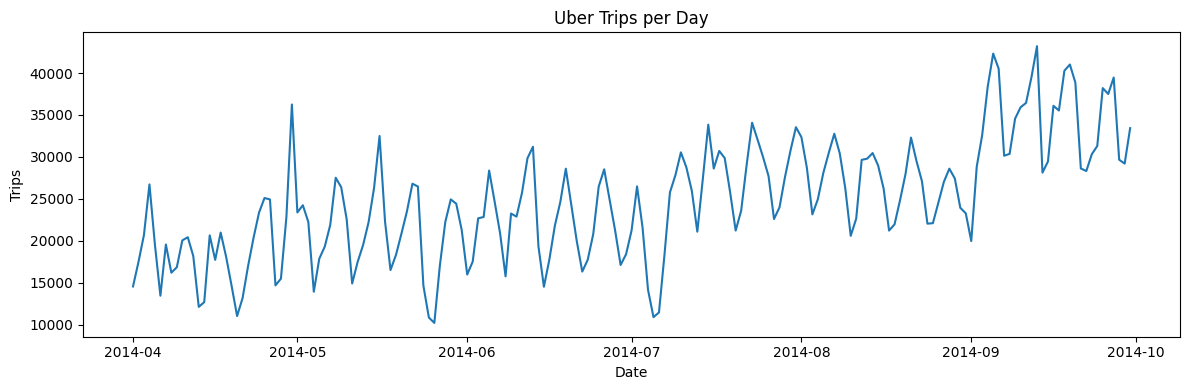

In [18]:
trips_per_day = df.groupby('date').size()
trips_per_day.plot(figsize=(12,4))
plt.title('Uber Trips per Day')
plt.ylabel('Trips')
plt.xlabel('Date')
plt.tight_layout()

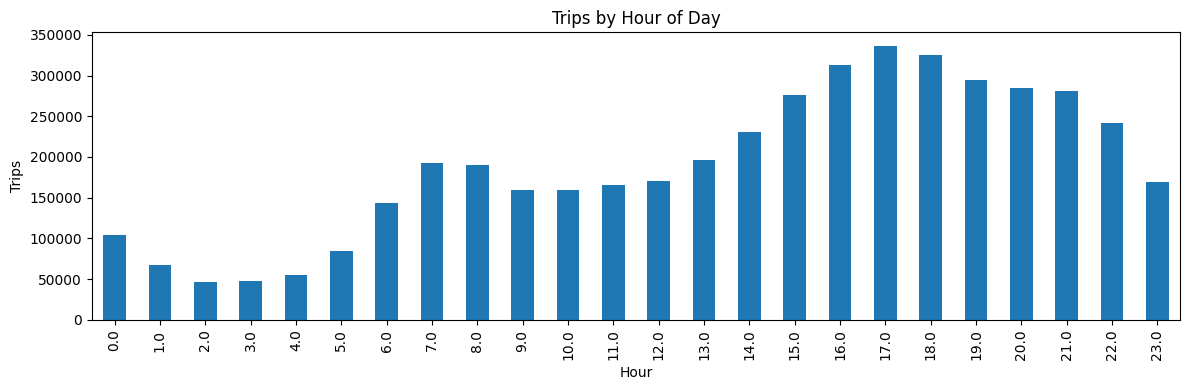

In [19]:
df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(12,4))
plt.title('Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.tight_layout()

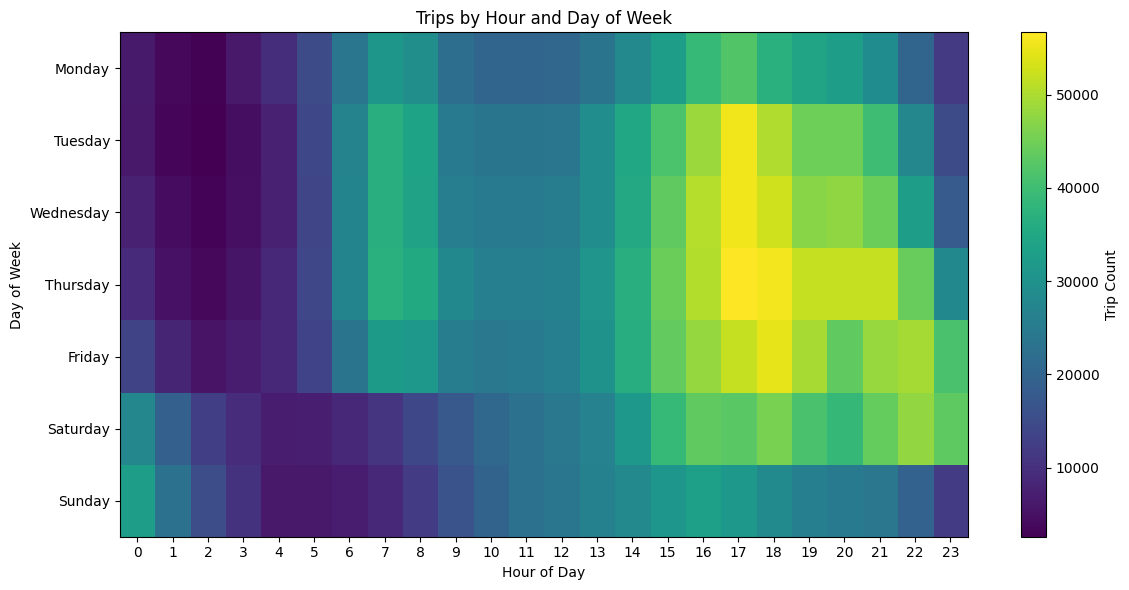

In [20]:
pivot = df.pivot_table(index='day_of_week', columns='hour', values=datetime_col, aggfunc='count')
pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(12,6))
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='Trip Count')
plt.xticks(ticks=np.arange(0,24), labels=np.arange(0,24))
plt.yticks(ticks=np.arange(7), labels=pivot.index)
plt.title('Trips by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()

In [ ]:
# Uncomment to save the cleaned data
# output_path = os.path.join(folder_path, 'uber_data_cleaned.csv')
# df.to_csv(output_path, index=False)
# print(f"Saved cleaned data to {output_path}")